<a href="https://colab.research.google.com/github/mikecchau/Classification-of-heart-disease/blob/main/Heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification model for heart disease prediction**

Utilizing an ML model for the purpose of classifying heart disease based upon patient feature data.

The UCI Heart Disease dataset is sourced from Kaggle and contains various feature variables per patient, along with a designation of whether the patient has/does not have heart disease.

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git clone https://github.com/mikecchau/heart_disease_project

Cloning into 'heart_disease_project'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
%cd /content/heart_disease_project

/content/heart_disease_project


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('heart-disease.csv')

The following table shows patient feature data from the heart disease dataset

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Exploratory data analysis

Explanation of features and label columns (sourced from Kaggle):

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The above table indicates that there is no missing data, all of the data is numeric, and no column transformations will be required.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Number of patients with heart disease:  165
Number of patients with no heart disease:  138


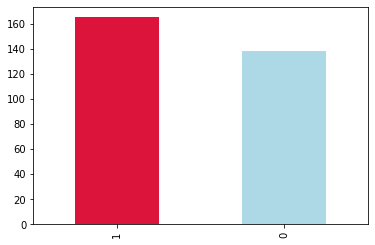

In [ ]:
print('Number of patients with heart disease: ', len(df[df['target'] == 1]))
print('Number of patients with no heart disease: ', len(df[df['target'] == 0]))
df.target.value_counts().plot(kind='bar', color=["crimson", "lightblue"])

Average age of patient:  54


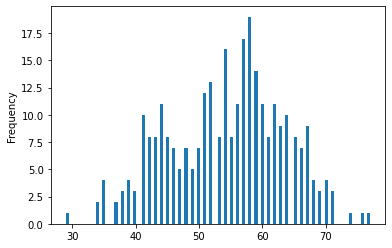

In [ ]:
print('Average age of patient: ', int(df.age.mean()))
df.age.plot.hist(bins=100);

Breakdown of dataset based on sex (1=male, 0=female):

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

A vizualization of heart disease frequency based upon sex. According to this, females comprise a lower population of the dataset, but the ratio of females that have heart disease among all females is significantly higher than the ratio of males that have heart disease among all males:

sex,0,1
target,,
0,24,114
1,72,93


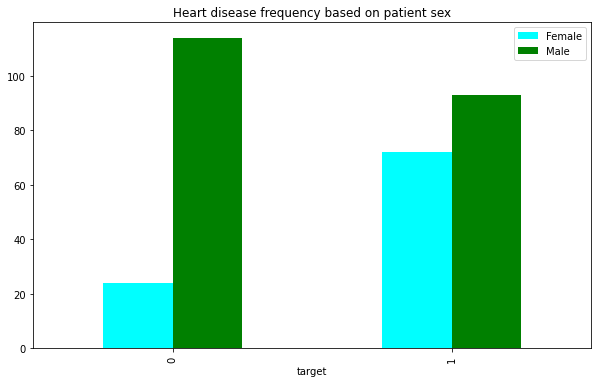

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    color=['cyan','green'],
                                    figsize=(10,6))
plt.title('Heart disease frequency based on patient sex')
plt.legend(['Female','Male'])

pd.crosstab(df.target, df.sex)

A vizualization of heart disease frequency dependent on differing chest pain cohorts:

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


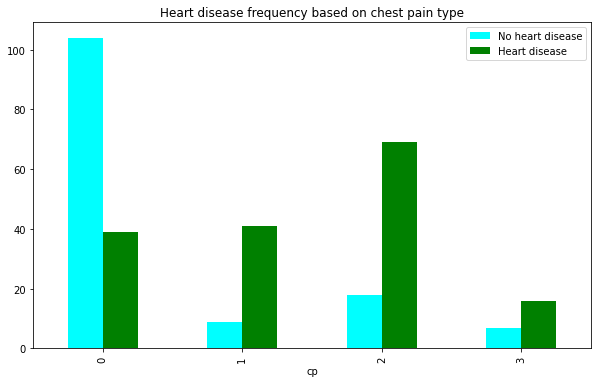

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                    color=['cyan','green'],
                                    figsize=(10,6))
plt.title('Heart disease frequency based on chest pain type')
plt.legend(['No heart disease','Heart disease'])

pd.crosstab(df.cp, df.target)

### Plotting age against maximum heart rate:

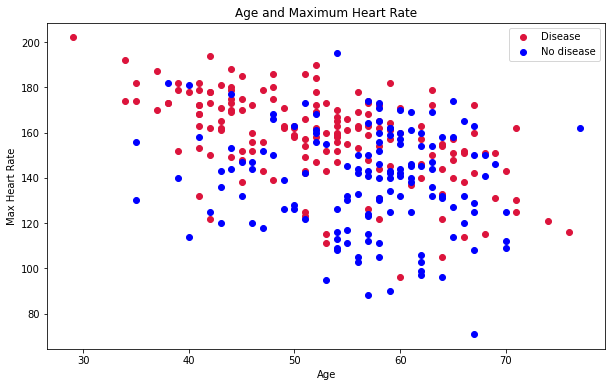

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='crimson')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age and Maximum Heart Rate')
plt.legend(['Disease','No disease']);

### Exploring a few more feature relationships:

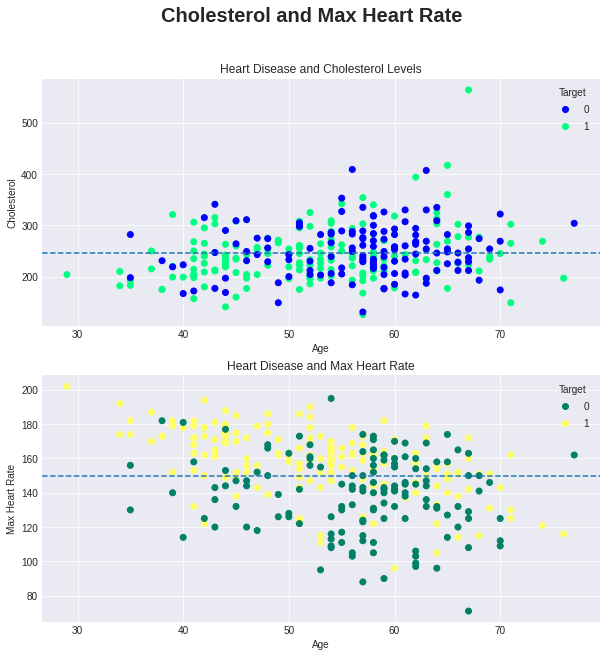

In [ ]:
# Create subplots of various dataset values for visualization
plt.style.use('seaborn-darkgrid')
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10))

fig.suptitle('Cholesterol and Max Heart Rate', fontsize=20,fontweight='bold')

# Create scatter plot of cholesterol values and find average
scatter=ax0.scatter(x=df['age'],
                    y=df['chol'],
                    c=df['target'],
                    cmap='winter')

ax0.set(title='Heart Disease and Cholesterol Levels',
        xlabel="Age",
        ylabel='Cholesterol')

ax0.legend(*scatter.legend_elements(), title='Target')
ax0.legend=(['No heart disease','Heart disease'])

ax0.axhline(y=df['chol'].mean(), linestyle='--');

# Create scatter plot of thalach values and find average
scatter=ax1.scatter(x=df['age'],
                    y=df['thalach'],
                    c=df['target'],
                    cmap='summer')

ax1.set(title='Heart Disease and Max Heart Rate',
        xlabel="Age",
        ylabel='Max Heart Rate')

ax1.legend(*scatter.legend_elements(), title='Target')

ax1.axhline(y=df['thalach'].mean(), linestyle='--');

### Generate a correlation matrix of features

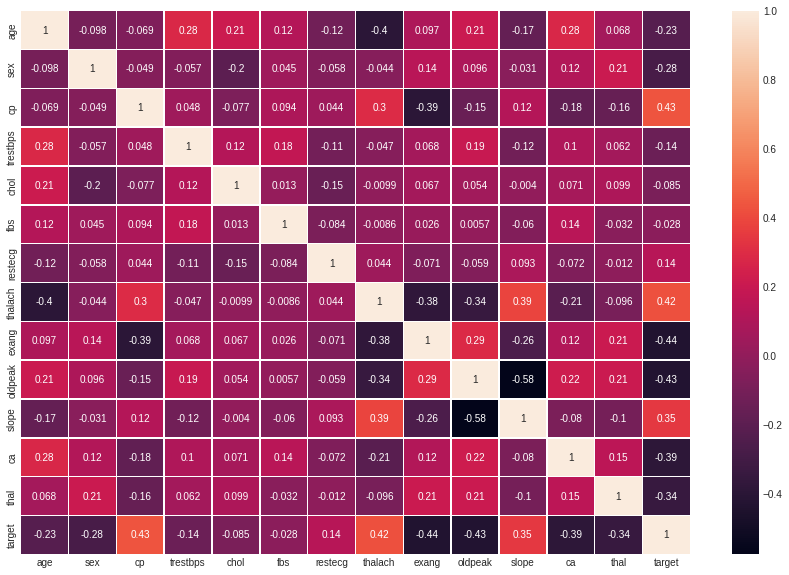

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 )

## Preparing data and feeding it into several classifiers

In [ ]:
# Create features matrix
X = df.drop('target', axis=1)

In [ ]:
# Create label matrix
y = df['target']

In [ ]:
# Create train/test split of data
from sklearn.model_selection import train_test_split
np.random.seed(23)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Import sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Import other modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Create a dictionary of models
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(23)
  model_scores={}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
# Fit and score the models
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.819672131147541,
 'Random Forest': 0.8032786885245902}

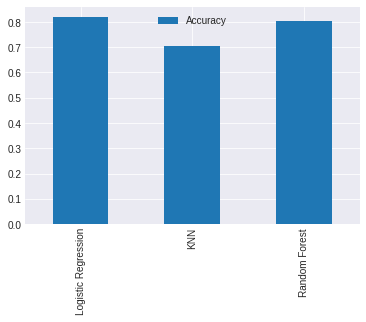

In [ ]:
# Model comparison
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar()

## Hyperparameter Tuning

Highest score on the test data: 0.7540983606557377


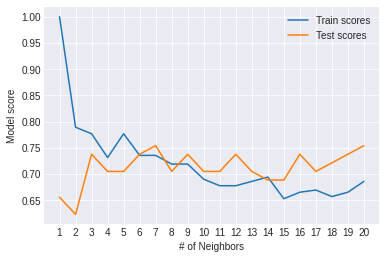

In [ ]:
# Tuning KNN by hand
train_scores=[]
test_scores=[]

neighbors = range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel('# of Neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Highest score on the test data: {max(test_scores)}')

Through tuning of KNN hyperparameters, accuracy of the model increased by 5%. However, this model still underperformed compared to Random Forest and Logistic Regression models.

## Utilizing RandomSearchCV

In [ ]:
# Creating a hyperparameter grid for LogisticRegression classifier
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

# Creating a hyperparameter grid for Random Forest classifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [ ]:
# Tuning Logistic Regression classifier
np.random.seed(23)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=10,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.819672131147541

In [ ]:
# Tuning Random Forest classifier
np.random.seed(23)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 760}

In [ ]:
rs_rf.score(X_test,y_test)

0.8032786885245902

As can be seen, RandomizedSearchCV did not yield a drastic improvement on accuracy scores.

## Utilizing GridSearchCV

In [ ]:
# Creating a hyperparameter grid for LogisticRegression classifier
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

In [ ]:
# Tuning Logistic Regression classifier
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,y_test)

0.819672131147541

## Evaluation of classifiers beyond accuracy

In [ ]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


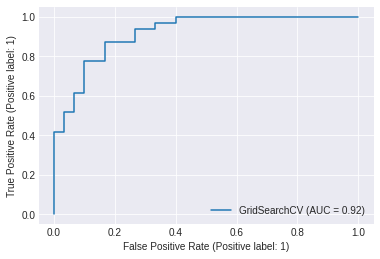

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
# Plot ROC curve for GridSearchCV Logistic Regression classifier
plot_roc_curve(gs_log_reg,X_test,y_test)

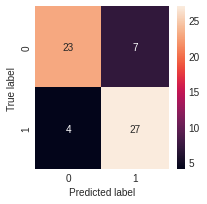

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
def plot_conf_mat(y_test,y_preds):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

plot_conf_mat(y_test,y_preds)

In [ ]:
# Evaluate cross-validated metrics for Logistic Regression model
from sklearn.model_selection import cross_val_score
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [ ]:
# Reinstantiate best model obtained from GridSearchCV
clf = LogisticRegression(C=1.3738237958832638,
                         solver='liblinear')

In [ ]:
# Accuracy
cv_acc = np.mean(cross_val_score(clf,
                         X,y,
                         cv=5,
                         scoring='accuracy'))

print('Avg cross-validated accuracy: ', cv_acc)

Avg cross-validated accuracy:  0.8215300546448088


In [ ]:
# Precision
cv_precision = np.mean(cross_val_score(clf,
                         X,y,
                         cv=5,
                         scoring='precision'))

print('Avg cross-validated precision: ', cv_precision)

Avg cross-validated precision:  0.817900063251107


In [ ]:
# Recall
cv_recall = np.mean(cross_val_score(clf,
                         X,y,
                         cv=5,
                         scoring='recall'))

print('Avg cross-validated recall: ', cv_recall)

Avg cross-validated recall:  0.8727272727272727


In [ ]:
# f1-score
cv_f1 = np.mean(cross_val_score(clf,
                         X,y,
                         cv=5,
                         scoring='f1'))

print('Avg cross-validated f1-score: ', cv_f1)

Avg cross-validated f1-score:  0.8431741323998502


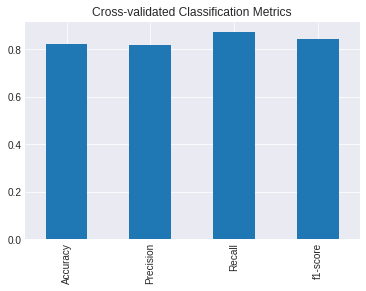

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'f1-score':cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-validated Classification Metrics',
                      legend=False);

## Feature importance of Logistic Regression model

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

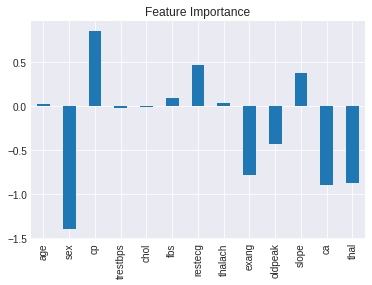

In [ ]:
# Check coef_
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [ ]:
# Retrain Logistic Regression model with a more condensed set of features
# Create a new features matrix
X = df.drop(['target', 'age','chol','trestbps','thalach','fbs'],axis=1)

In [ ]:
# Create label matrix
y = df['target']

In [ ]:
# Create train/test split of data
np.random.seed(13)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Repeat Grid Search with altered feature matrix

In [ ]:
# Creating a hyperparameter grid for LogisticRegression classifier
new_log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

In [ ]:
# Tuning Logistic Regression classifier
new_gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=new_log_reg_grid,
                                cv=5,
                                verbose=True)

new_gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
new_gs_log_reg.score(X_test,y_test)

0.8360655737704918

By eliminating non-useful features, the model accuracy improves by almost 2%

### Calculate cross-validated accuracy for new model

In [ ]:
# Reinstantiate best model obtained from GridSearchCV
new_gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [ ]:
new_clf = LogisticRegression(C=17.433288221999874,
                         solver='liblinear')

In [ ]:
# Accuracy
new_cv_acc = np.mean(cross_val_score(new_clf,
                         X,y,
                         cv=5,
                         scoring='accuracy'))

print('Avg cross-validated accuracy: ', new_cv_acc)

Avg cross-validated accuracy:  0.8380327868852457
